#### Here I have imported all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('quikr_car - quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car.shape

(892, 6)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


- Here I can see that **year, price and kms_driven** are in object but they want to be int or float

In [5]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

- Year is in string format so I have to change it into numerical

In [6]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

- - Price is also in string so I have to convert into numerical

In [7]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [8]:
car = car[car['year'].str.isnumeric()]

In [9]:
car['year'] = car['year'].astype(int)

- astype returns a new dataframe where the data types has been changed to the specified datatype.

In [10]:
car = car[car['Price'] != 'Ask For Price']

- It will ignore that data who is not equal to Ask For Price

In [11]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [12]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

- It will replace comma by nothing and will change datatype with the help of astype keyword

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [14]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

- kms_driven values will split by white space and will get only 0th position and it will replace comma with nothing

In [15]:
car = car[car['kms_driven'].str.isnumeric()]

In [16]:
car['kms_driven'] = car['kms_driven'].astype(int)

- It will change the datatype 

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


- Above all are the reflected changes

In [18]:
car = car[~car['fuel_type'].isna()]

- It will ignore na values in fuel_type

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

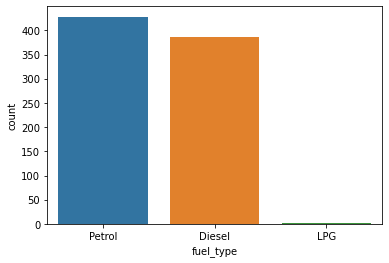

In [19]:
sns.countplot(x = 'fuel_type', data = car)

In [20]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

- I have to take only first three words of each car name so I have splited and slice by 0th position upto 3, so it will consider upto 2 for eg. ['hyundai' ,'santro' ,'xing'] [0, 1, 2] and have join (concatenate) that words

In [21]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


- As above index position is not accurate after 0, 1 directly 3 appeared 

In [22]:
car = car.reset_index(drop=True)

- So I have reset this index

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


- Now the data looks fine 

In [24]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


- In describe I have observed that for price the min value is 3 lakh and the 25% percentile price is 1.75lakh, 50% percentile price 3lakh , 75% percentile price is also fine 4.9lakh but the max price is 85lakh this is a outlier I have detected. Because 75% of cars are below 5lakh and suddenly the number increased by anything

#### Outlier detected

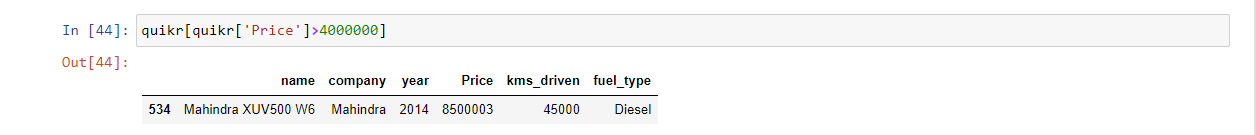

In [25]:
car = car[car['Price']<4000000].reset_index(drop=True)

In [26]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [27]:
X = car.drop('Price',axis=1)
y = car['Price']

- Since price is my target feature (dependent feature) i gonna drop this

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

- Since this data is in continuos I use linear regression with performance metrics i.e. r2_score and to convert categorical data into numerical I have use OneHotEncoder and make_column_transformer I have specified the no of columns I have to encode and lastly pipeline will automatically complete all the process

In [30]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [31]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [32]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [33]:
lr = LinearRegression()

In [34]:
pipe = make_pipeline(column_trans,lr)

In [35]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [36]:
y_pred = pipe.predict(X_test)

In [37]:
r2_score(y_test, y_pred)

0.5232261351344261

In [38]:
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(r2_score(y_test, y_pred), i)
    scores.append(r2_score(y_test, y_pred))

0.7852425416626871 0
0.5125329954390436 1
0.6903320946309455 2
0.5995042932558412 3
0.8538307173340905 4
0.7472189241951475 5
0.6257517128888461 6
0.6859812152508706 7
0.7646095915730756 8
0.73107907342576 9


In [39]:
np.argmax(scores)

4

In [40]:
scores[np.argmax(scores)]

0.8538307173340905

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8538307173340905

In [42]:
pipe.predict(pd.DataFrame([['Ford EcoSport Titanium','Ford',2014,36000,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([547829.94127961])

- Here is the predicition
        - actual price was : 575000
        - predicted price was : 547829
        
        - Difference between actual and predicted : 27171

In [43]:
pipe.predict(pd.DataFrame([['Ford Figo','Ford',2012,41000,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([176181.13612315])

- Here is the predicition
        - actual price was : 175000
        - predicted price was : 176181
        
        - Difference between actual and predicted : 1181

In [44]:
pip list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
